# PageRank西游记人物节点重要度代码实战

In [1]:
# 导入工具包
import networkx as nx
import pandas as pd
import numpy as np

import random
from tqdm import tqdm # 进度条
import matplotlib.pyplot as plt


plt.rcParams['font.sans-serif'] = ['SimHei']   #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False   #用来正常显示负号

## 导入数据生成图

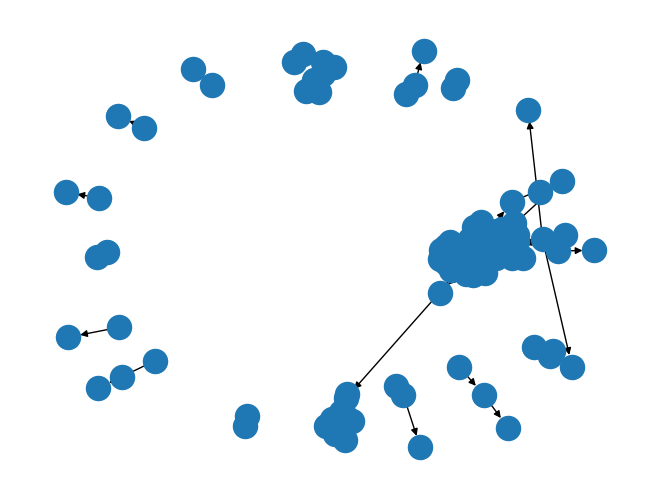

In [18]:
# 导入人物关系数据表
df=pd.read_csv('triples.csv')

G=nx.DiGraph()
edges=[edge for edge in zip(df['head'],df['tail'])]
G.add_edges_from(edges)
nx.draw(G)

## 计算PageRank值

In [3]:
pagerank=nx.pagerank(G,
                    alpha=0.85,#阻尼系数
                    personalization=None,#是否要随机传送
                    max_iter=100,
                    tol=1e-06,#收敛误差
                    nstart=None,#每个节点的初始PageRank值
                    dangling=None #死胡同节点
                    )
pagerank

{'金蝉子': 0.0028889203144616088,
 '唐僧': 0.13349105557884888,
 '孙悟空': 0.10498354112014094,
 '猪八戒': 0.09247797536009736,
 '沙僧': 0.07627154154696374,
 '白龙马': 0.09531260474698808,
 '陈光蕊': 0.0028889203144616088,
 '殷温娇': 0.005344620286308959,
 '法明和尚': 0.0028889203144616088,
 '李世民': 0.052002919751408624,
 '殷开山': 0.0028889203144616088,
 '菩提老祖': 0.0028889203144616088,
 '镇元子': 0.0028889203144616088,
 '牛魔王': 0.010256020230003658,
 '蛟魔王': 0.0028889203144616088,
 '鹏魔王': 0.0028889203144616088,
 '狮驼王': 0.0028889203144616088,
 '猕猴王': 0.0028889203144616088,
 '禺狨王': 0.0028889203144616088,
 '天蓬元帅': 0.0028889203144616088,
 '卵二姐': 0.01860884001045803,
 '高翠兰': 0.02579183411604112,
 '卷帘大将': 0.0028889203144616088,
 '西海龙王': 0.0028889203144616088,
 '西海龙母': 0.0028889203144616088,
 '敖摩昂太子': 0.0028889203144616088,
 '西海龙女': 0.0028889203144616088,
 '李渊': 0.0028889203144616088,
 '李建成': 0.0028889203144616088,
 '李元吉': 0.0028889203144616088,
 '王珪': 0.0028889203144616088,
 '秦琼': 0.0028889203144616088,
 '萧瑀': 0.002888920314

In [4]:
sorted(pagerank.items(),key=lambda x:x[1],reverse=True)


[('唐僧', 0.13349105557884888),
 ('孙悟空', 0.10498354112014094),
 ('白龙马', 0.09531260474698808),
 ('猪八戒', 0.09247797536009736),
 ('沙僧', 0.07627154154696374),
 ('李世民', 0.052002919751408624),
 ('观音菩萨', 0.026625716774094633),
 ('高翠兰', 0.02579183411604112),
 ('卵二姐', 0.01860884001045803),
 ('太上老君', 0.014430996933862522),
 ('如来', 0.013334300311185142),
 ('牛魔王', 0.010256020230003658),
 ('哪吒', 0.009171370913926254),
 ('灵吉菩萨', 0.007800320258156309),
 ('宼栋', 0.007432108638238391),
 ('昴日星官', 0.007432108638238391),
 ('后羿', 0.007432108638238391),
 ('李靖', 0.006787403654483575),
 ('殷温娇', 0.005344620286308959),
 ('寇梁', 0.005344620286308959),
 ('袁天罡', 0.005344620286308959),
 ('金角', 0.005344620286308959),
 ('银角', 0.005344620286308959),
 ('西海龙王太子', 0.005344620286308959),
 ('弥勒佛', 0.005344620286308959),
 ('毗蓝婆菩萨', 0.005344620286308959),
 ('文殊菩萨', 0.005344620286308959),
 ('普贤菩萨', 0.005344620286308959),
 ('太乙救苦天尊', 0.005344620286308959),
 ('嫦娥', 0.005344620286308959),
 ('南极寿星', 0.005344620286308959),
 ('东来佛祖笑和尚'

## 用节点尺寸可视化

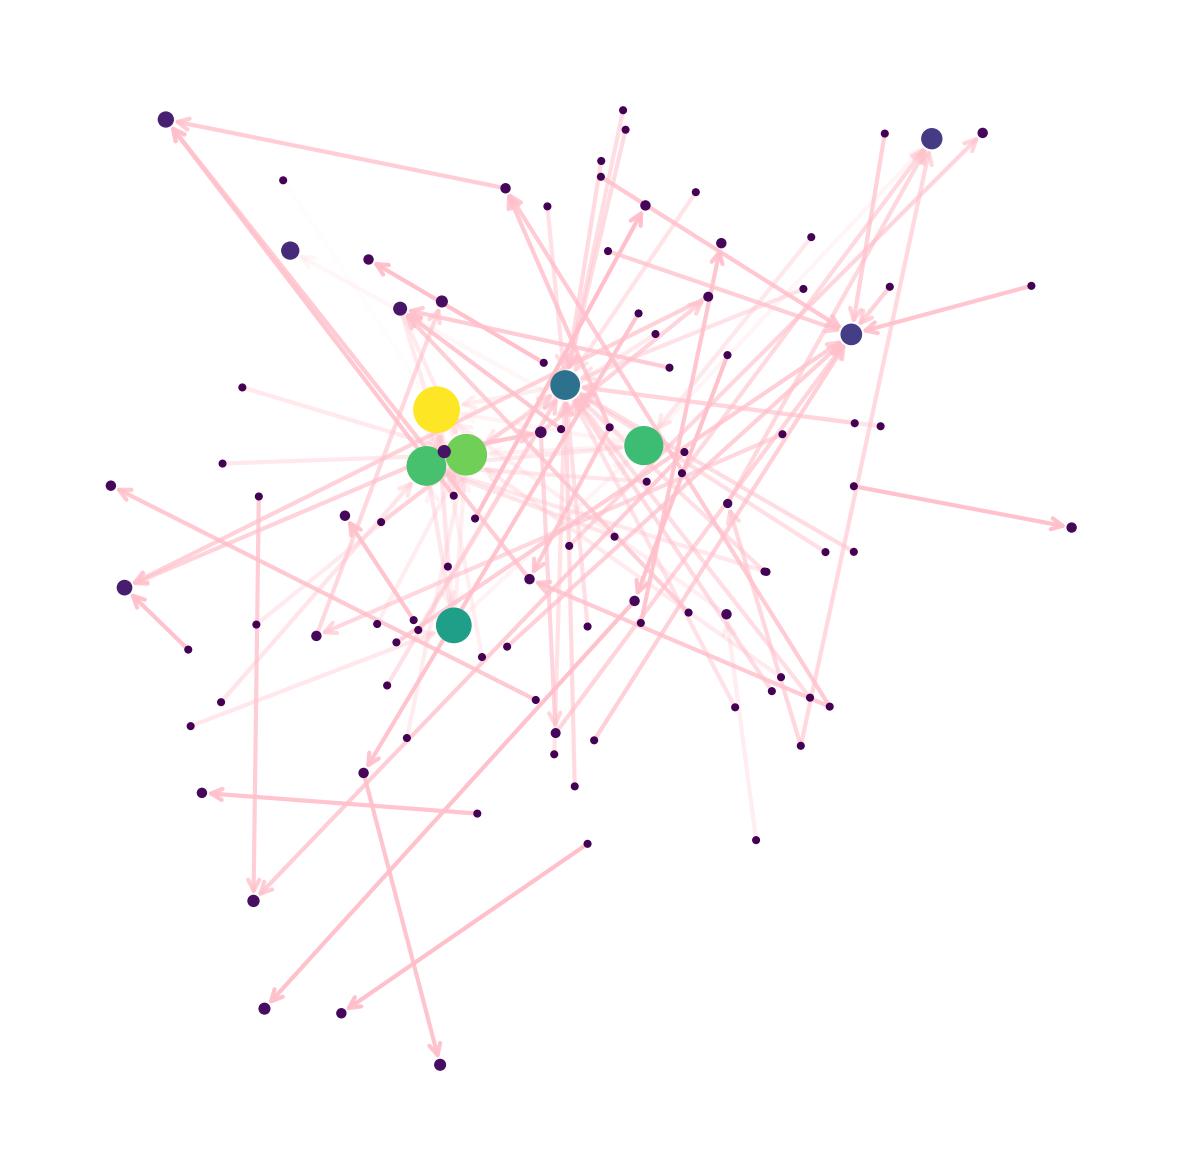

In [14]:
#pPageRank值越大，节点尺寸越大
node_size=(np.array(list(pagerank.values()))*8000).astype(int)
#节点颜色
N=G.number_of_edges()
edge_color=range(2,N+2)

plt.figure(figsize=(15,15))
pos=nx.spring_layout(G,iterations=3,seed=5)
nodes=nx.draw_networkx_nodes(G,pos,node_size=node_size,node_color=node_size)
edges=nx.draw_networkx_edges(G,pos,node_size=node_size,
                        arrowstyle='->',
                        arrowsize=20,
                        edge_color='pink',
                        edge_cmap=plt.cm.plasma,
                        width=3)
# 设置每个连接的透明度
edge_alphas=[(5+i)/(N+4) for i in range(N)]
#print(edge_alphas)
for i in range(N):
    edges[i].set_alpha(edge_alphas[i])

ax=plt.gca()
ax.set_axis_off()
plt.show()